<a href="https://colab.research.google.com/github/Sumit-Kumar-Dash/PyTorch/blob/main/PyTorch_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
pip install torch

# Download Dataset

In [46]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

In [47]:
ROOT_DATA_DIR = "FashionMNISTDir"

train_data = datasets.FashionMNIST(
    root = ROOT_DATA_DIR,
    train = True,
    download = True,
    transform = transforms.ToTensor()
    )

In [48]:
test_data = datasets.FashionMNIST(
    root = ROOT_DATA_DIR,
    train = False, ## <<< Test data
    download = True,
    transform = transforms.ToTensor()
    )

In [49]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [50]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [51]:
train_data.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [52]:
train_data.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [53]:
label_map = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3:' Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
    }

# Visualize one sample

In [54]:
def view_sample_img(data,index,label_map):
    plt.imshow(data.data[index],cmap="gray")
    plt.axis("off")
    plt.title(f"data label: {label_map[data.targets[index].item()]}")

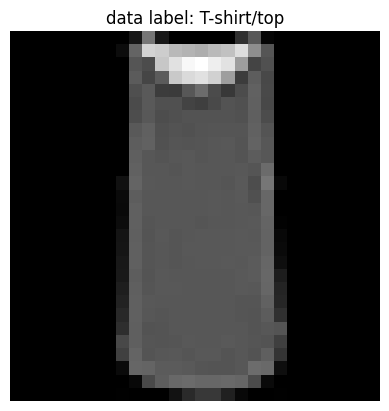

In [55]:
view_sample_img(train_data,index=2,label_map=label_map)

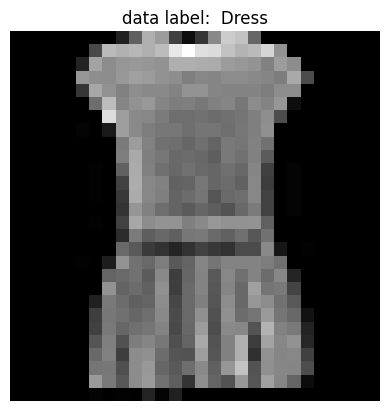

In [56]:
view_sample_img(train_data,index=3,label_map=label_map)

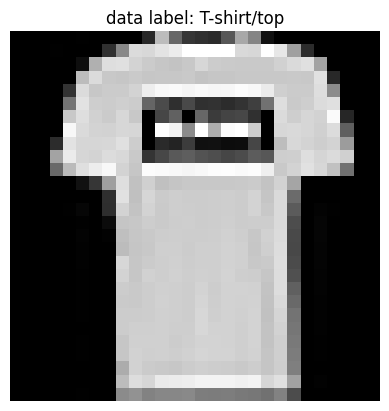

In [57]:
view_sample_img(train_data,index=1,label_map=label_map)

# Create the dataholder

In [58]:
BATCH_SIZE = 64

train_data_loader = DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE,
                               shuffle=True)

test_data_loader = DataLoader(dataset=test_data,
                               batch_size=BATCH_SIZE,
                               shuffle=True)

In [59]:
for data, label in test_data_loader:
    print(data.shape)
    print(label.shape)
    break

torch.Size([64, 1, 28, 28])
torch.Size([64])


# CNN Architecture

In [60]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [61]:
class CNN(nn.Module):
  def __init__(self,in_,out_):
    super(CNN,self).__init__()

    self.conv_pool_01 = nn.Sequential(
        nn.Conv2d(in_channels=in_,out_channels=8,kernel_size=5,stride=1,padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2))
    self.conv_pool_02 = nn.Sequential(
        nn.Conv2d(in_channels=8,out_channels=16,kernel_size=5,stride=1,padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2))
    self.Flatten = nn.Flatten()
    self.FC_01 = nn.Linear(in_features=16*4*4,out_features=128)
    self.FC_02 = nn.Linear(in_features=128,out_features=64)
    self.FC_03 = nn.Linear(in_features=64, out_features=out_)

  def forward(self, x):
      x = self.conv_pool_01(x)
      x = self.conv_pool_02(x)
      x = self.Flatten(x)
      x = self.FC_01(x)
      x = F.relu(x)
      x = self.FC_02(x)
      x = F.relu(x)
      x = self.FC_03(x)
      return x

In [62]:
model = CNN(1, 10)
model.to(device)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)

# Count no. of trainable params

In [63]:
def count_params(model):
  model_params = {"Modules":list(),"Parameters":list()}
  total = 0
  for name,parameter in model.named_parameters():
    if not parameter.requires_grad:
      continue
    param = parameter.numel()
    model_params["Modules"].append(name)
    model_params["Parameters"].append(param)
    total+=param

  df = pd.DataFrame(model_params)
  df = df.style.set_caption(f"total trainable parameters: {total}")
  return df

In [64]:
count_params(model)

,Modules,Parameters
0,conv_pool_01.0.weight,200
1,conv_pool_01.0.bias,8
2,conv_pool_02.0.weight,3200
3,conv_pool_02.0.bias,16
4,FC_01.weight,32768
5,FC_01.bias,128
6,FC_02.weight,8192
7,FC_02.bias,64
8,FC_03.weight,640
9,FC_03.bias,10


# Training Loop

In [65]:
learning_rate = 0.001
num_epochs = 20

In [66]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [67]:
n_total_steps = len(train_data_loader)
n_total_steps

938

In [68]:
60000/BATCH_SIZE

937.5

In [69]:
for epoch in range(num_epochs):
    with tqdm(train_data_loader) as tqdm_epoch:
        for images, labels in tqdm_epoch:
            tqdm_epoch.set_description(f"Epoch {epoch + 1}/{num_epochs}")

            images = images.to(device)
            labels = labels.to(device)

            # forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # backward prop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            tqdm_epoch.set_postfix(loss=loss.item())

Epoch 20/20: 100%|██████████| 938/938 [00:27<00:00, 33.66it/s, loss=0.169]


# save trained model


In [70]:
## save trained model -
os.makedirs("06_03_session_dir", exist_ok=True)
modle_file = os.path.join("06_03_session_dir", 'CNN_model.pth')
torch.save(model, modle_file)

# Evaluate the model

In [71]:
model = torch.load("06_03_session_dir/CNN_model.pth")

In [72]:
pred = np.array([])
target = np.array([])

with torch.no_grad():
    for batch, data in enumerate(test_data_loader):
        image, label = data[0].to(device), data[1].to(device)

        y_pred = model(image)

        pred = np.concatenate((pred, torch.argmax(y_pred, 1).cpu().numpy()))
        target = np.concatenate((target, label.cpu().numpy()))

In [73]:
cm = confusion_matrix(target, pred)

<Axes: >

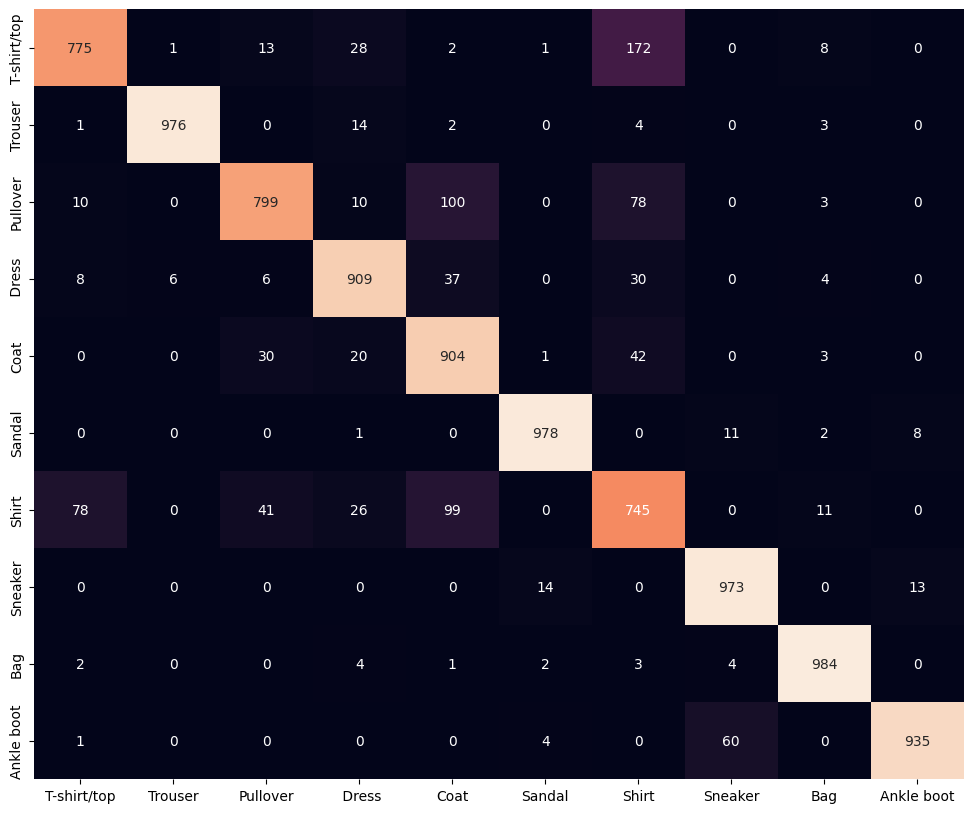

In [74]:
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_map.values(), yticklabels=label_map.values(), cbar=False)

# Prediction

In [75]:
data = next(iter(test_data_loader))
data

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0510, 0.0000, 0.0039],
           [0.0000, 0.0000, 0.0000,  ..., 0.7843, 0.0000, 0.0000],
           [0.0000

In [76]:
len(data)

2

In [77]:
images,label = data

In [78]:
images.shape

torch.Size([64, 1, 28, 28])

In [79]:
label.shape

torch.Size([64])

torch.Size([1, 28, 28])


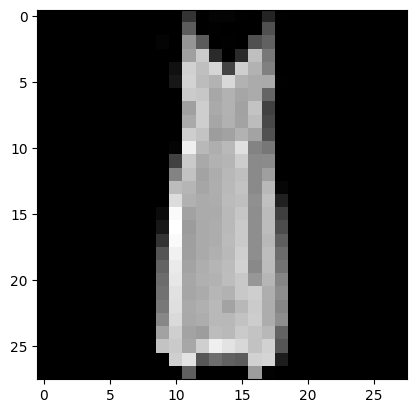

In [80]:
img = images[0]
print(img.shape)
plt.imshow(img.permute(1,2,0),cmap='gray')

In [81]:
img.shape, img.squeeze().shape, img.unsqueeze(1).shape

(torch.Size([1, 28, 28]), torch.Size([28, 28]), torch.Size([1, 1, 28, 28]))

In [82]:
logit = model(img.unsqueeze(1).to(device))
logit

tensor([[ -2.5790,  -2.4619,  -3.5031,   5.1928,  -2.5642, -11.9766,  -1.1262,
         -14.2467,  -6.7074, -15.1284]], grad_fn=<AddmmBackward0>)

In [89]:
sum([ -2.5790,  -2.4619,  -3.5031,   5.1928,  -2.5642, -11.9766,  -1.1262,
         -14.2467,  -6.7074, -15.1284])

-55.100699999999996

In [84]:
pred_prob = F.softmax(logit, dim=1)
pred_prob

tensor([[4.2006e-04, 4.7227e-04, 1.6673e-04, 9.9671e-01, 4.2634e-04, 3.4832e-08,
         1.7958e-03, 3.5982e-09, 6.7668e-06, 1.4899e-09]],
       grad_fn=<SoftmaxBackward0>)

In [90]:
sum([4.2006e-04, 4.7227e-04, 1.6673e-04, 9.9671e-01, 4.2634e-04, 3.4832e-08,
         1.7958e-03, 3.5982e-09, 6.7668e-06, 1.4899e-09])

0.9999980067200999

In [85]:
argmax = torch.argmax(pred_prob).item()
argmax

3

In [86]:
label_map[argmax]

' Dress'

In [87]:
def predict(data, model, label_map, device, idx=0):
    images, labels = data
    img = images[idx]
    label = labels[idx]

    plt.imshow(img.permute(1,2,0), cmap="gray")
    reshaped_img = img.unsqueeze(1).to(device)
    logits = model(reshaped_img)
    pred_prob = F.softmax(logits, dim=1)
    argmax = torch.argmax(pred_prob).item()
    predicted_label = label_map[argmax]
    actual_label = label_map[label.item()]
    plt.title(f"actual: {actual_label} | predicted: {predicted_label}")
    return predicted_label, actual_label

('Bag', 'Bag')

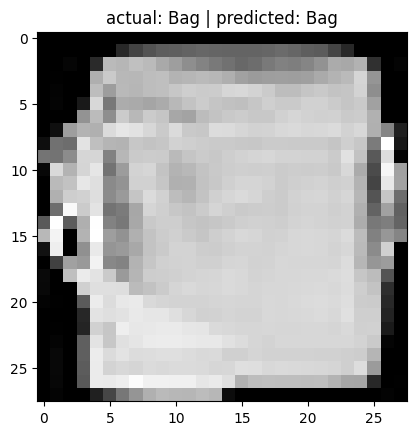

In [88]:
data = next(iter(test_data_loader))
predict(data, model, label_map, device, idx=0)

# Transfer Learning